# Comparación de 3 métodos de solución de EDOs

In [59]:
from pylab import *
from scipy.integrate import *

In [37]:
def mi_euler(ec_EDO, t, x0, delta = 0.01): 
    #ec_edo es el sistema a integrar
    #t es el intervalo de integración
    #x0 es el punto inicial
    #h juega el rol de paso
    tiempos = arange(t[0],t[1] + delta, delta) #Hace la partición dle tiempo.
    M,N = len(x0), len(tiempos)
    sol = zeros((M,N)) #Para acomodar las soluciones
    sol[:, 0] = x0
    for i in range(N-1): #Inician las iteraciones
        sol[:, i+1] = sol[:,i] + delta*ec_EDO(tiempos[i], sol[:,i]) #De la deducción dada en la libreta
    return sol, tiempos

def rk2(ec_edo, t, x0, args=[], delta =0.1):
    t_n = arange(t[0], t[1]+delta, delta)
    M, N = len(x0), len(t_n)
    sol = zeros ( (M,N))
    sol[:,0] = x0
    for i in range (N-1):
        t_med = 0.5*(t_n[i] + t_n[i+1])
        x_med = sol[:, i] + 0.5 * delta * ec_edo(t_n[i], sol[:, i])
        sol[:, i+1] = sol[:, i] + delta*ec_edo(t_med, x_med)
    return sol, t_n

def rk4(ec_edo, t, x0, args=[], delta =0.1):
    t_n = arange(t[0], t[1]+delta, delta)
    M, N = len(x0), len(t_n)
    sol = zeros ( (M,N))
    sol[:, 0] = x0
    for i in range (N-1):
        t_med = 0.5*(t_n[i] + t_n[i+1])
        k1 = ec_edo(t_n[i], sol[:,i])
        x_med = sol[:, i] + 0.5 * delta * k1
        k2 = ec_edo(t_med,x_med)
        x_med = sol[:, i] + 0.5*delta*k2
        k3 = ec_edo(t_med,x_med)
        x_med = sol[:, i] + delta * k3
        k4 = ec_edo(t_n[i+1], x_med)
        sol[:, i+1] = sol[:, i] + (delta/6)*(k1 + 2*k2 + 2*k3 + k4)
    return sol, t_n

### Sistema de ecuaciones del péndulo

$$
\dot \theta = v_{\theta} \\ 
\dot v_{\theta} = -\frac{g}{\ell} \sin(\theta)
$$

In [22]:
def pendulo(t, y, gl = 1):
    # th, v_th = y[0], y[1]
    return array([y[1], -gl*sin(y[0])])


In [81]:
#Iniciamos con e de EULER

ci = [pi/4, 0] #Ángulo inicial con velocidad inicial
t = [0, 50] #Intervalo de tiempo en segundos
sol_euler, t_E = mi_euler(pendulo, t, ci)
sol_rk2, t_2 = rk2(pendulo, t, ci)
sol_rk4, t_4 = rk4(pendulo, t, ci)

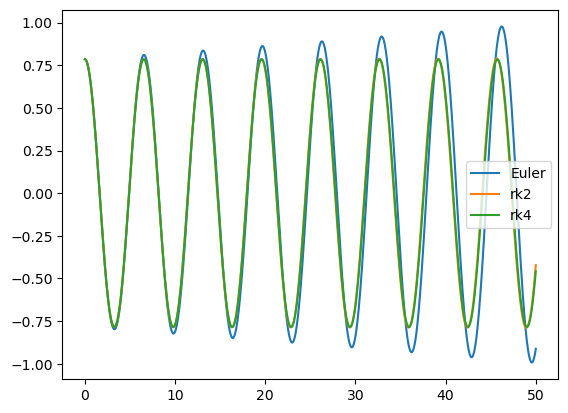

In [82]:
plot(t_E, sol_euler[0], label = 'Euler')
plot(t_2, sol_rk2[0], label = 'rk2')
plot(t_4, sol_rk4[0], label = 'rk4')
legend()
show()

In [78]:
%%timeit
sol_rk4, t_4 = rk4(pendulo, t, ci)

12.4 ms ± 454 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [79]:
%%timeit
sol_rk2, t2 = rk2(pendulo, t, ci)

5.01 ms ± 161 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [80]:
%%timeit
sol_euler, t_E = mi_euler(pendulo, t, ci)

26.6 ms ± 1.29 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [106]:
juan = solve_ivp(pendulo, t, ci, dense_output = True)

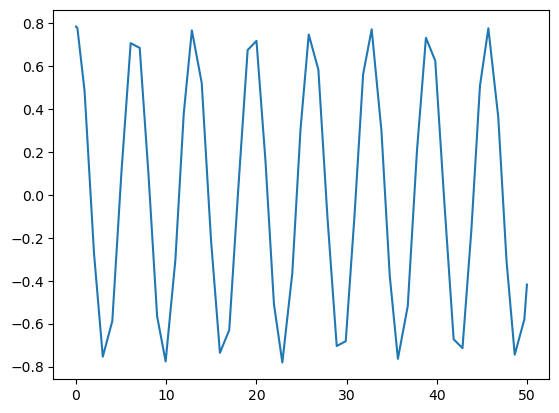

In [107]:
plot(juan.t,juan.y[0])

In [108]:
len(juan.t)

55

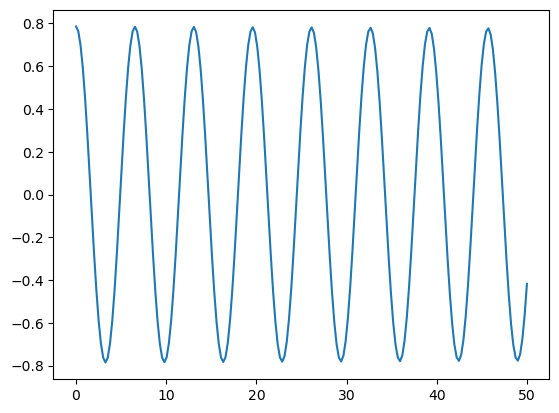

In [109]:
mi_t = linspace(t[0],t[1], 200)
plot(mi_t, juan.sol(mi_t)[0])